Create Dataset class

In [67]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import os
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.io import read_image

class Birds270Dataset(Dataset):
    def make_labels(self, csv_table):
        bird_str_labels = csv_table["labels"].unique()
        self.labels_str_to_int = {label:i  for i, label in enumerate(bird_str_labels)}
        self.labels_int_to_str = {i:label  for i, label in enumerate(bird_str_labels)}
        
    def __init__(self, dataset_dir, set_type="train", transform=None, selected_birds=None):
        csv_table = pd.read_csv(os.path.join(dataset_dir, "birds.csv"))
        if selected_birds != None:
            csv_table = csv_table[csv_table["labels"].isin(selected_birds)]
        self.img_data = csv_table[csv_table["data set"]==set_type]
        self.make_labels(self.img_data)
        self.dataset_dir = dataset_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_data)

    def __getitem__(self, idx):
        filepaths_col = self.img_data.columns.get_loc("filepaths")
        labels_col = self.img_data.columns.get_loc("labels")
        img_path = os.path.join(self.dataset_dir, self.img_data.iat[idx, filepaths_col])
        image = read_image(img_path).float()
        label = self.img_data.iat[idx, labels_col]
        if self.transform:
            image = self.transform(image)
        int_label = self.labels_str_to_int[label]
        return image, int_label
    
            
    

selected_birds is a list of species which will be included in the dataset.

Transform tr normalizes colors to range [-1,1] as suggested in tutorials.

In [68]:
dataset_dir = "../data/birds270"
selected_birds = ["ALBATROSS", "BALD EAGLE", "BARN OWL", "EURASIAN MAGPIE", "FLAMINGO",
                  "MALLARD DUCK", "OSTRICH", "PEACOCK", "PELICAN", "TRUMPTER SWAN"]
tr = transforms.Normalize((127.5, 127.5, 127.5), (127.5, 127.5, 127.5)) # normalizes colors to range [-1,1]
train_dataset = Birds270Dataset(dataset_dir, set_type="train", selected_birds=selected_birds, transform=tr)
test_dataset = Birds270Dataset(dataset_dir, set_type="test", selected_birds=selected_birds, transform=tr)

In [69]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

The code loads first batch and displays the first picture from the batch

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])
tensor([[[ 0.6235,  0.6235,  0.6314,  ...,  0.6314,  0.6314,  0.6392],
         [ 0.6157,  0.6157,  0.6235,  ...,  0.6235,  0.6235,  0.6235],
         [ 0.5922,  0.5922,  0.5922,  ...,  0.6235,  0.6235,  0.6235],
         ...,
         [ 0.0510,  0.0510,  0.0431,  ..., -0.0039,  0.0118,  0.0118],
         [ 0.0275,  0.0275,  0.0275,  ..., -0.0824, -0.0980, -0.1059],
         [-0.0353, -0.0275, -0.0275,  ..., -0.1373, -0.1686, -0.1922]],

        [[ 0.7176,  0.7176,  0.7255,  ...,  0.7333,  0.7333,  0.7412],
         [ 0.7098,  0.7098,  0.7176,  ...,  0.7255,  0.7255,  0.7255],
         [ 0.6863,  0.6863,  0.6863,  ...,  0.7255,  0.7255,  0.7255],
         ...,
         [ 0.0510,  0.0510,  0.0431,  ...,  0.0039,  0.0196,  0.0196],
         [ 0.0275,  0.0275,  0.0275,  ..., -0.0745, -0.0902, -0.0980],
         [-0.0353, -0.0275, -0.0275,  ..., -0.1294, -0.1608, -0.1843]],

        [[ 0.8118,  0.8118, 

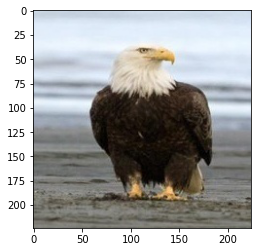

Label (number): 1, (name): BALD EAGLE


In [70]:
#function for displaying a picture
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0].item()
print(img)
imshow(img)
label_str = train_dataset.labels_int_to_str[label]
print(f"Label (number): {label}, (name): {label_str}")